# The following analysis will explore the dataset provided by the city of  Spokane Valley pertaining to City Council Member Al Merkel's specific public records request: 

"All records of pulbic information requests for councilman Al Merkel nextdoor account. Including (name, email, phone number, address) of requests".



In [1]:
#-- Importing the nessesary libraries --#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
#-- Importing the dataset --#
df = pd.read_csv("/Users/michaelsegaline/Desktop/Spokane Valley Public records requests/city response to all records requests concerning Merkel nextdoor (1).csv")

In [3]:
#-- Inspecting the dataset head --#
df.head()


,Create Date,Customer Full Name,Customer Email,Public Record Desired,Request Status,Reference No
0,1/2/24 10:42,Alyssa Reed,a.reed@cretelligent.com,Copies of certificates of occupancy for 13525 ...,Completed: Full Release,P230353-010224
1,1/2/24 10:43,Alyssa Reed,a.reed@cretelligent.com,Copies of documents related to any current ope...,Completed: No Records Exist,P230354-010224
2,1/2/24 12:43,Mr. Todd Whipple,info@whipplece.com,"The application materials, preliminary plat of...",Completed: Full Release,P230355-010224
3,1/2/24 15:51,Abby Whitmore,abby.whitmore@efulcrum.net,"Hello, I am writing a Phase I Environmental S...",Completed: Full Release,P230356-010224
4,1/2/24 8:00,Mr. William Lenz,william.lenz@foster.com,The latest draft of the Painted Hills Staff Re...,Completed: Full Release,P230357-010224


In [4]:
#-- Inspecting the shape of the dataset --#
df.shape

(473, 6)

In [5]:
#-- Inspecting the variable sparisty --#

# Assuming df is your DataFrame
sparsity = df.isnull().mean() * 100  # Percentage of NaNs per column

print(sparsity.sort_values(ascending=False))

Customer Full Name       6.131078
Customer Email           0.634249
Create Date              0.000000
Public Record Desired    0.000000
Request Status           0.000000
Reference No             0.000000
dtype: float64


# Data Cleaning / Feature Engineering

In [5]:
#-- First, convert 'Create Date' to datetime format --#
df['Create Date'] = pd.to_datetime(df['Create Date'], format='%m/%d/%y %H:%M')

# Now extract the parts
df['month'] = df['Create Date'].dt.month
df['day'] = df['Create Date'].dt.day
df['year'] = df['Create Date'].dt.year
df['time'] = df['Create Date'].dt.time


In [6]:
#-- Inspecting the columns --#
df.columns

Index(['Create Date', 'Customer Full Name', 'Customer Email',
       'Public Record Desired', 'Request Status', 'Reference No', 'month',
       'day', 'year', 'time'],
      dtype='object')

# Creating a seperate dataset for all instances that involve "Merkel"

In [6]:
#-- Looking for all instances that contain "Merkel" in the Public Record Desired column--#
merkel_matches = df[df['Public Record Desired'].str.contains('Merkel', case=False, na=False)]


In [7]:
#-- There are 51 instances that contain the name "Merkel" --#
merkel_matches.shape

(51, 6)

In [8]:
#-- Checking the Sparisty % of Merkel_matches --#

# Assuming df is your DataFrame
sparsity2 = merkel_matches.isnull().mean() * 100  # Percentage of NaNs per column

print(sparsity2.sort_values(ascending=False))

Customer Full Name       1.960784
Create Date              0.000000
Customer Email           0.000000
Public Record Desired    0.000000
Request Status           0.000000
Reference No             0.000000
dtype: float64


# Requests involving "Merkel" account for 10.7% of the dataset.

In [36]:
51 / 473

0.10782241014799154

In [9]:
#-- Saving the dataset to csv for additional inspection --#
merkel_matches.to_csv("/Users/michaelsegaline/Desktop/Spokane Valley Public records requests/Merkel_matches.csv")

# Now making a Spokane Valley baseline dataset without Merkel instances named "no_merkel"

In [10]:
# Create new dataset with no instances of "Merkel" (case-insensitive)
no_merkel = df[~df['Public Record Desired'].str.contains('merkel', case=False, na=False)]


In [11]:
#-- Inspecting the shape--#
no_merkel.shape

(422, 10)

In [12]:
#-- Inspecting for duplicate names --#
# Total rows
total_rows = len(no_merkel)

# Number of duplicate 'Customer Full Name' entries (excluding the first occurrence)
duplicate_count = no_merkel.duplicated(subset='Customer Full Name').sum()

# Percentage of duplicates
duplicate_percentage = (duplicate_count / total_rows) * 100

print(f"Duplicate 'Customer Full Name' entries: {duplicate_count}")
print(f"Percentage of duplicates: {duplicate_percentage:.2f}%")


Duplicate 'Customer Full Name' entries: 123
Percentage of duplicates: 29.15%


# Now conducting data visualization. Starting with the main dataset, then the Merkel "matches" dataset.

/var/folders/_5/26fwgmd14qz8pgwfvn4dfky40000gn/T/ipykernel_61988/2925618186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_merkel['hour'] = pd.to_datetime(no_merkel['time'].astype(str), format='%H:%M:%S').dt.hour


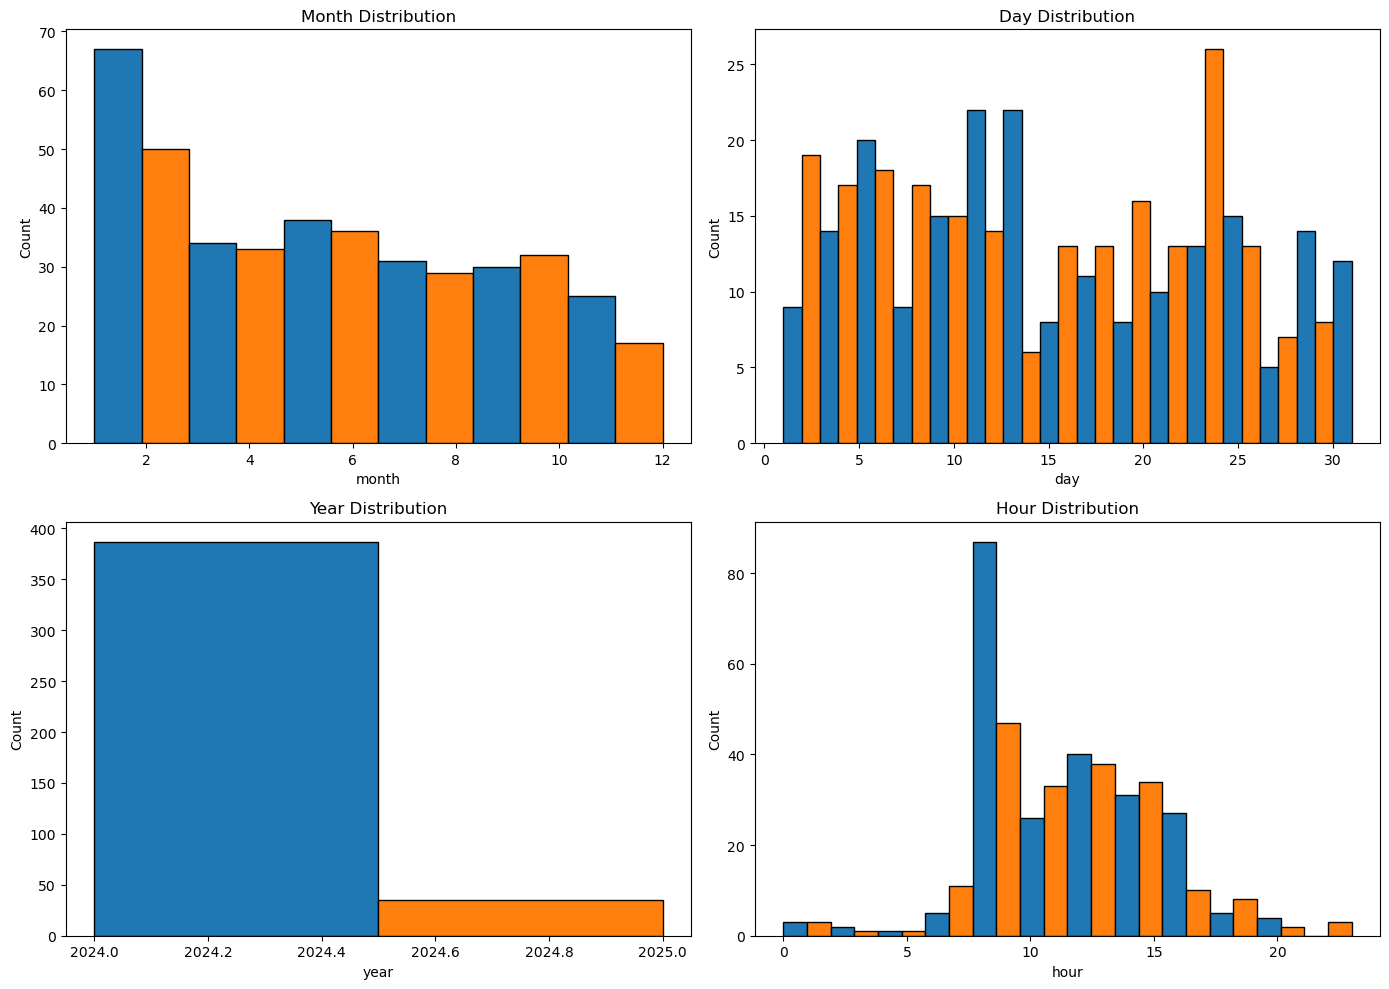

In [13]:
#-- Convert time to hour for histogram purposes--#
no_merkel['hour'] = pd.to_datetime(no_merkel['time'].astype(str), format='%H:%M:%S').dt.hour

#-- Function to generate alternating colors --#
def alternating_colors(n):
    return ['#1f77b4' if i % 2 == 0 else '#ff7f0e' for i in range(n)]

#-- Create subplots --#
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

#-- Plotting helper function --#
def plot_with_alternating_colors(ax, data, bins, title):
    sns.histplot(data, bins=bins, ax=ax, edgecolor='black')
    colors = alternating_colors(len(ax.patches))
    for patch, color in zip(ax.patches, colors):
        patch.set_facecolor(color)
    ax.set_title(title)

#-- Plot each variable --#
plot_with_alternating_colors(axes[0], no_merkel['month'], bins=12, title='Month Distribution')
plot_with_alternating_colors(axes[1], no_merkel['day'], bins=31, title='Day Distribution')
plot_with_alternating_colors(axes[2], no_merkel['year'], bins=len(no_merkel['year'].unique()), title='Year Distribution')
plot_with_alternating_colors(axes[3], no_merkel['hour'], bins=24, title='Hour Distribution')

plt.tight_layout()
plt.show()

# The below cell visualizes the "Request Status" for the mainset minus Merkel

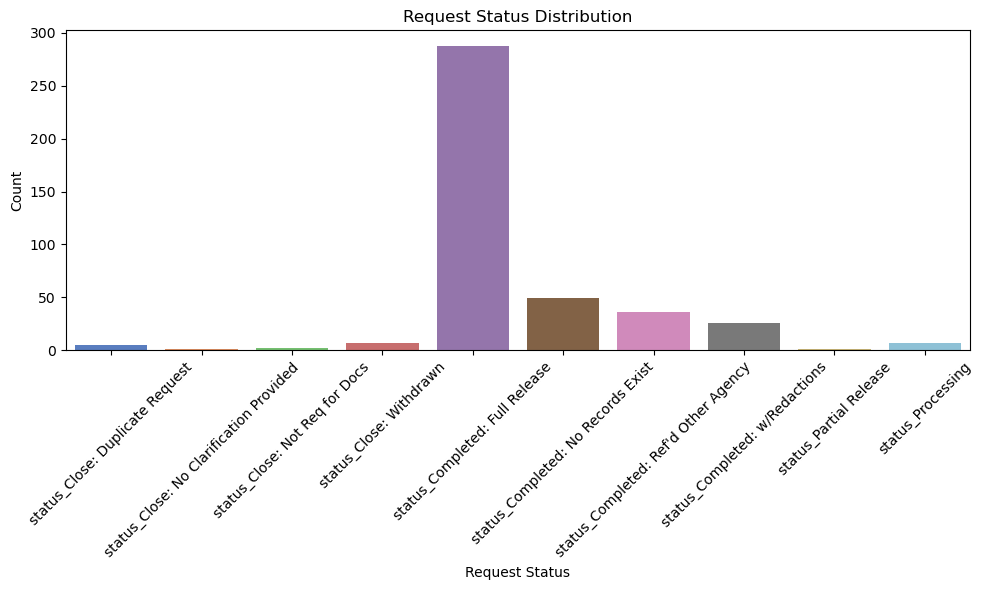

In [14]:
#-- Step 1: Convert 'Request Status' to binary (one-hot encoding) --#
base_request_dummies = pd.get_dummies(no_merkel['Request Status'], prefix='status')

# Optional: Join the dummies back to original df (if needed)
df = pd.concat([no_merkel, base_request_dummies], axis=1)

# Step 2: Visualize with histogram
# Sum the binary columns to get count per category
status_counts = base_request_dummies.sum().reset_index()
status_counts.columns = ['Request Status', 'Count']

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=status_counts, x='Request Status', y='Count', palette='muted')
plt.title('Request Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# The below visualization is a Wordcloud of the most common words in the descriptions of "Public Record Desired". Word size indicated the frequency.

Generating a WordCloud for the cities public data request, minus all instances with the word "Merkel" in the description of the Public Record Desired column.

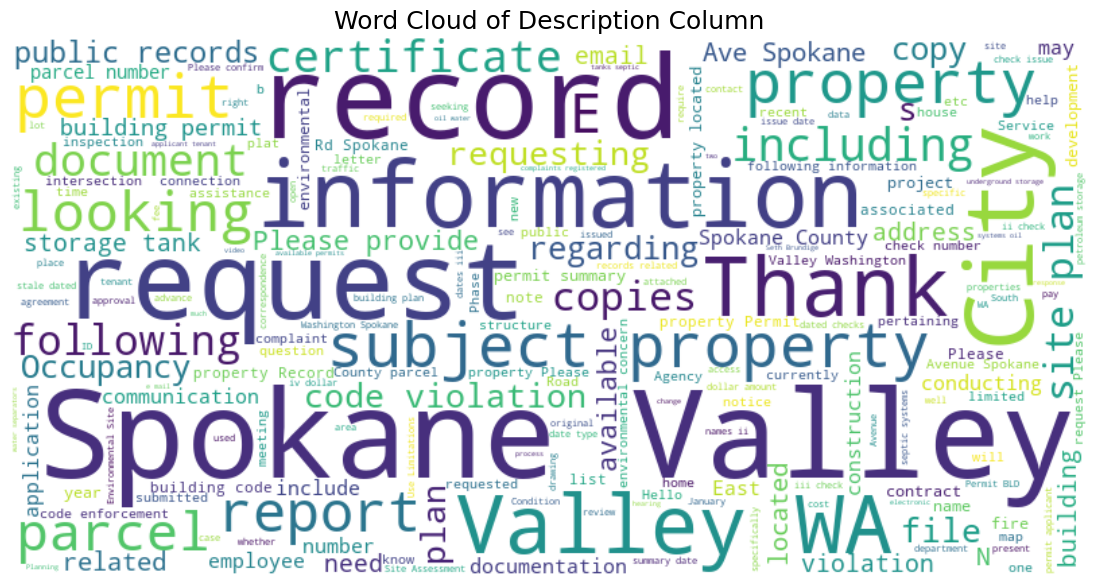

In [15]:
#-- Combine all text in the 'description' column into a single string --#
text = " ".join(no_merkel['Public Record Desired'].dropna().astype(str).values)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Description Column", fontsize=18)
plt.show()


# Now Visualizing Merkel's data

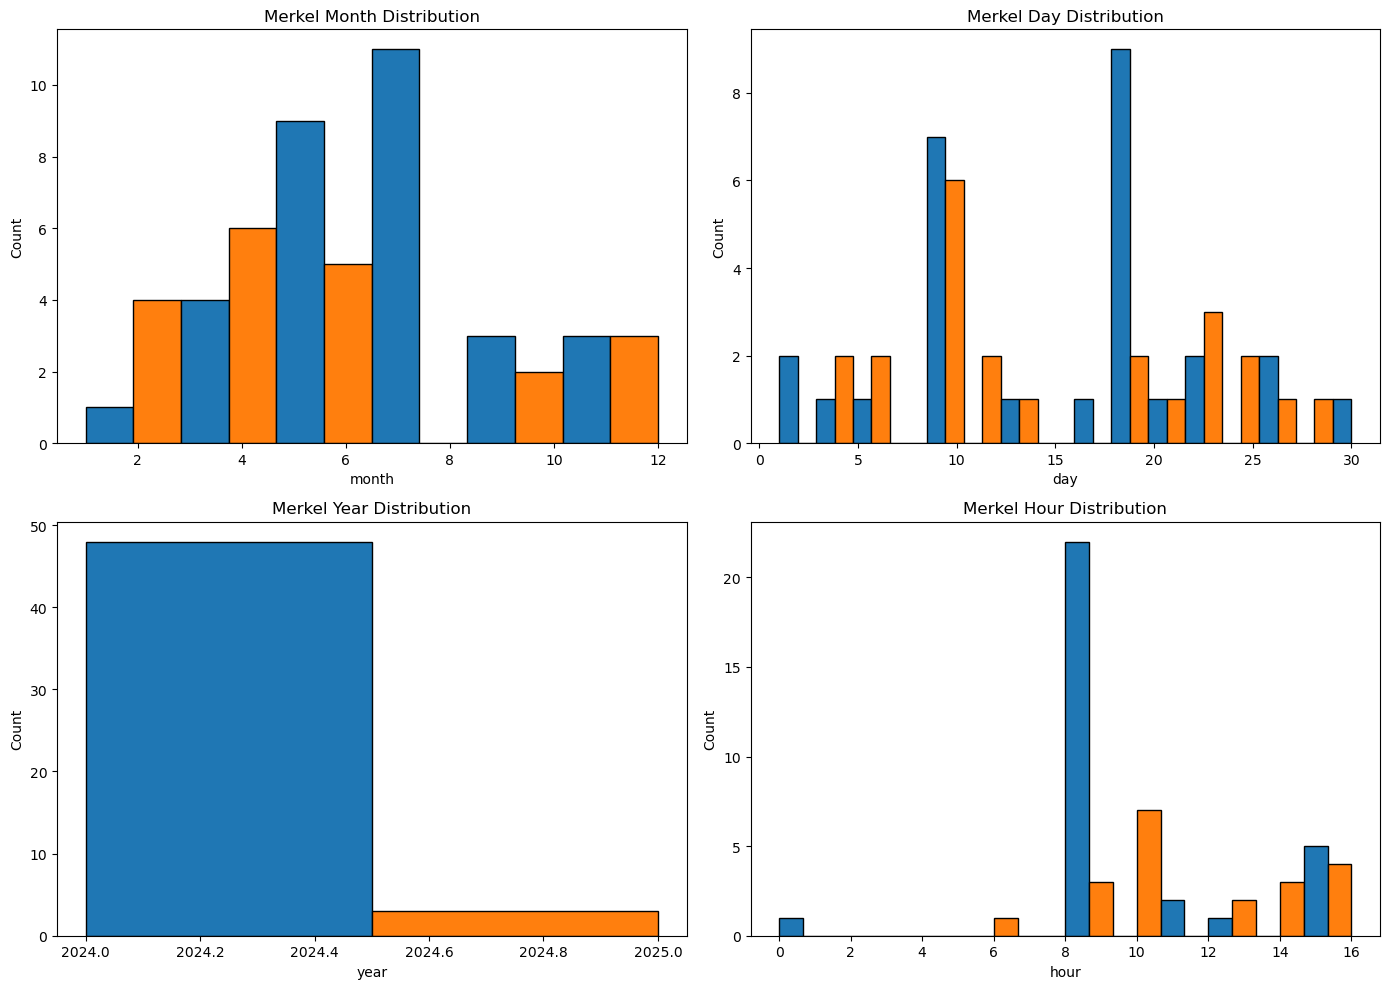

In [19]:
#-- Convert time to hour for histogram purposes--#
merkel_matches['hour'] = pd.to_datetime(merkel_matches['time'].astype(str), format='%H:%M:%S').dt.hour

#-- Function to generate alternating colors --#
def alternating_colors(n):
    return ['#1f77b4' if i % 2 == 0 else '#ff7f0e' for i in range(n)]

#-- Create subplots --#
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

#-- Plotting helper function --#
def plot_with_alternating_colors(ax, data, bins, title):
    sns.histplot(data, bins=bins, ax=ax, edgecolor='black')
    colors = alternating_colors(len(ax.patches))
    for patch, color in zip(ax.patches, colors):
        patch.set_facecolor(color)
    ax.set_title(title)

#-- Plot each variable --#
plot_with_alternating_colors(axes[0], merkel_matches['month'], bins=12, title='Merkel Month Distribution')
plot_with_alternating_colors(axes[1], merkel_matches['day'], bins=31, title='Merkel Day Distribution')
plot_with_alternating_colors(axes[2], merkel_matches['year'], bins=len(merkel_matches['year'].unique()), title='Merkel Year Distribution')
plot_with_alternating_colors(axes[3], merkel_matches['hour'], bins=24, title='Merkel Hour Distribution')

plt.tight_layout()
plt.show()

# Now inspecting the number of duplicate values for Merkel requests. 

In [21]:
#-- Inspecting for duplicate names --#
# Total rows
total_rows = len(merkel_matches)

# Number of duplicate 'Customer Full Name' entries (excluding the first occurrence)
duplicate_count = merkel_matches.duplicated(subset='Customer Full Name').sum()

# Percentage of duplicates
duplicate_percentage = (duplicate_count / total_rows) * 100

print(f"Duplicate 'Customer Full Name' entries: {duplicate_count}")
print(f"Percentage of duplicates: {duplicate_percentage:.2f}%")


Duplicate 'Customer Full Name' entries: 28
Percentage of duplicates: 54.90%


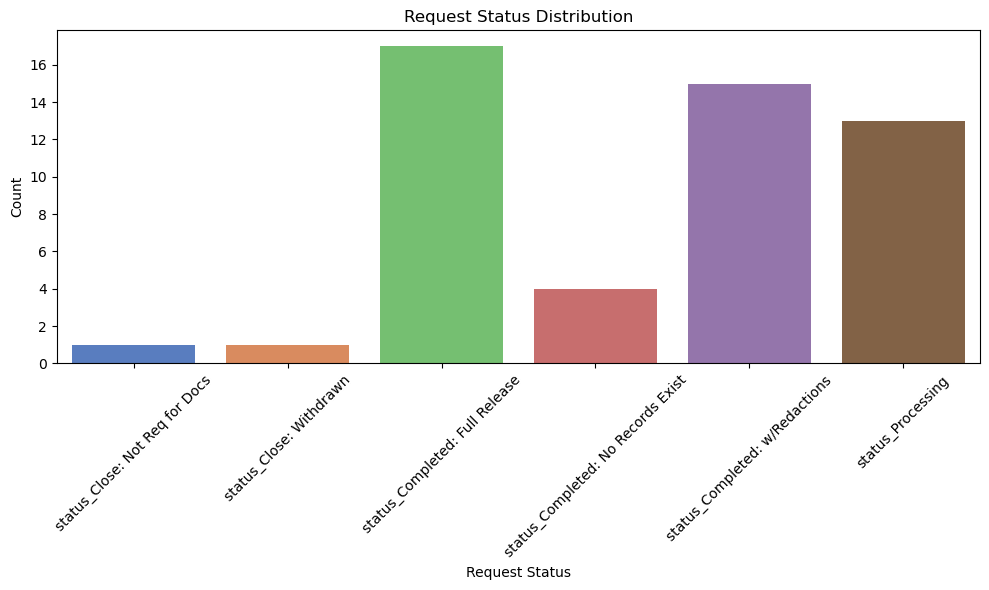

In [22]:
#-- Step 1: Convert 'Request Status' to binary (one-hot encoding) --#
merkel_request_dummies = pd.get_dummies(merkel_matches['Request Status'], prefix='status')

# Optional: Join the dummies back to original df (if needed)
df = pd.concat([merkel_matches, merkel_request_dummies], axis=1)

# Step 2: Visualize with histogram
# Sum the binary columns to get count per category
status_counts = merkel_request_dummies.sum().reset_index()
status_counts.columns = ['Request Status', 'Count']

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=status_counts, x='Request Status', y='Count', palette='muted')
plt.title('Request Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

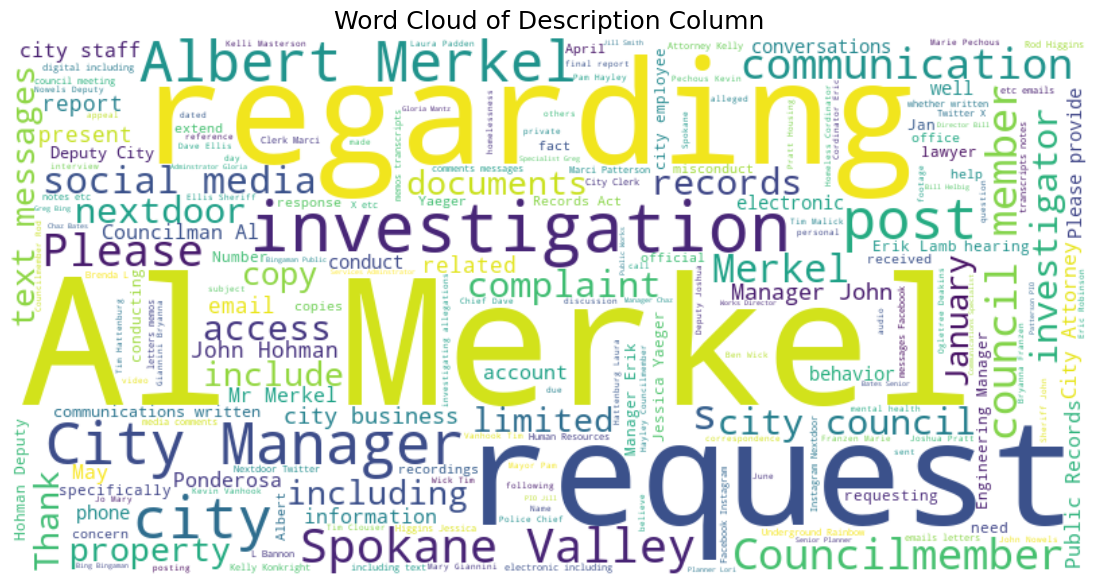

In [23]:
#-- Combine all text in the 'description' column into a single string --#
text = " ".join(merkel_matches['Public Record Desired'].dropna().astype(str).values)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Description Column", fontsize=18)
plt.show()

# Now inspecting the processing rate for records requests pertaining to Al Merkel.


# Now exploring the the differences in the probability distrobutions using machine learning

Comparing the processing rates between the city's baseline record processing rate compared to Al Merkels.

In [26]:
#-- Calculating the processing rate of Al Merkel requests --#

merkel_processing_count = (merkel_matches['Request Status'] == 'Processing').sum()
print("Number of 'Processing' instances related to Merkel:", merkel_processing_count)


Number of 'Processing' instances: 13


In [39]:
#-- Creatind a new varaible dividing the sum of all Merkel instances by the by the number of Merkel instances still processing --#

merkel_processing_rate = 1 - (13 / 51)

print('Al Merkel processing request rate %:', merkel_processing_rate )

Al Merkel processing request rate %: 0.7450980392156863


# Now calculating the processing rate for the city

In [28]:
#-- Calculating the processing rate of requests for the city of Spokane Valley --#

base_processing_count = (no_merkel['Request Status'] == 'Processing').sum()
print("Number of 'Processing' instances for the city, minus Merkel:", base_processing_count)


Number of 'Processing' instances related to the City of Spokane Valley minus Al Merkel: 7


In [38]:
sv_processing_rate = 1- (7 / 422)
print('Spokane Valley processing request rate %:', sv_processing_rate )

Spokane Valley processing request rate %: 0.9834123222748815


# Processing requests for Al Merkel are 24% lower than the baseline.